# <center> Zestaw 4
## <center> Ryszard Pręcikowski
### <center> 401433

In [9]:
import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt
import matplotlib
from scipy.integrate import quad
np.set_printoptions(precision=3, suppress=True)

In [10]:
def plot_approx(original, approx, points = None, a = -1, b = 1):
    plt.rcParams.update({'font.size': 22})
    lf = lambdify(x, original)
    # la = lambdify(x, approx)
    x_v = np.linspace(a,b, 1000)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    axes[0].plot(x_v, lf(x_v), label = "original")
    axes[0].plot(x_v, approx(x_v), label = "approximated")
    if points is not None:
        axes[0].scatter(points[0], points[1], s = 12, label = "nodes")
    axes[0].legend()
    axes[0].set_title("approximation and original function")
    axes[0].grid(True)

    error_func = lambda x: abs(lf(x) - approx(x))
    axes[1].plot(x_v, error_func(x_v), label = "error")
    axes[1].legend()
    axes[1].set_title("error function")
    axes[1].grid(True)
    fig.tight_layout()
    plt.show()

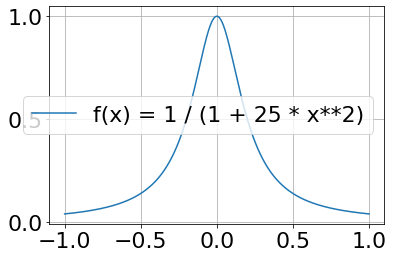

In [11]:
f = 1/ (1 + 25 * x ** 2)

lf = lambdify(x, f)
x_v = np.linspace(-1, 1, 1000)


plt.plot(x_v, lf(x_v), label = "f(x) = 1 / (1 + 25 * x**2)")
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 1 
### Aproksymacja średniokwadratowa punktowa dla równomiernie rozmieszczonych punktów.

### a) metoda wykorzystująca zmienne pomocnicze $S_k$ i $T_k$

#### $S_k = \sum_{i=0}^{n} x_j^k, k = 0,1, \dots, 2m $
#### $T_k = \sum_{i=0}^n x_i^j y_i, k = 0,1, \dots, m $

#### współczynniki wielomianu aproksymującego obliczymy rozwiązując układ równań:
$$S\cdot a = T$$

$$\begin{bmatrix} 
S_0 & S_1 & \dots & S_m \\
S_1 & S_2 & \dots & S_{m+1} \\
S_2 & S_3 & \dots & S_{m+2} \\
\vdots & \vdots & \ddots  & \vdots \\
S_m & S_{m+1} & \dots & S_{2m} 
\end{bmatrix} 
\cdot
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_m
\end{bmatrix}
= 
\begin{bmatrix}
T_0 \\
T_1 \\
T_2 \\
\vdots \\
T_m
\end{bmatrix}$$

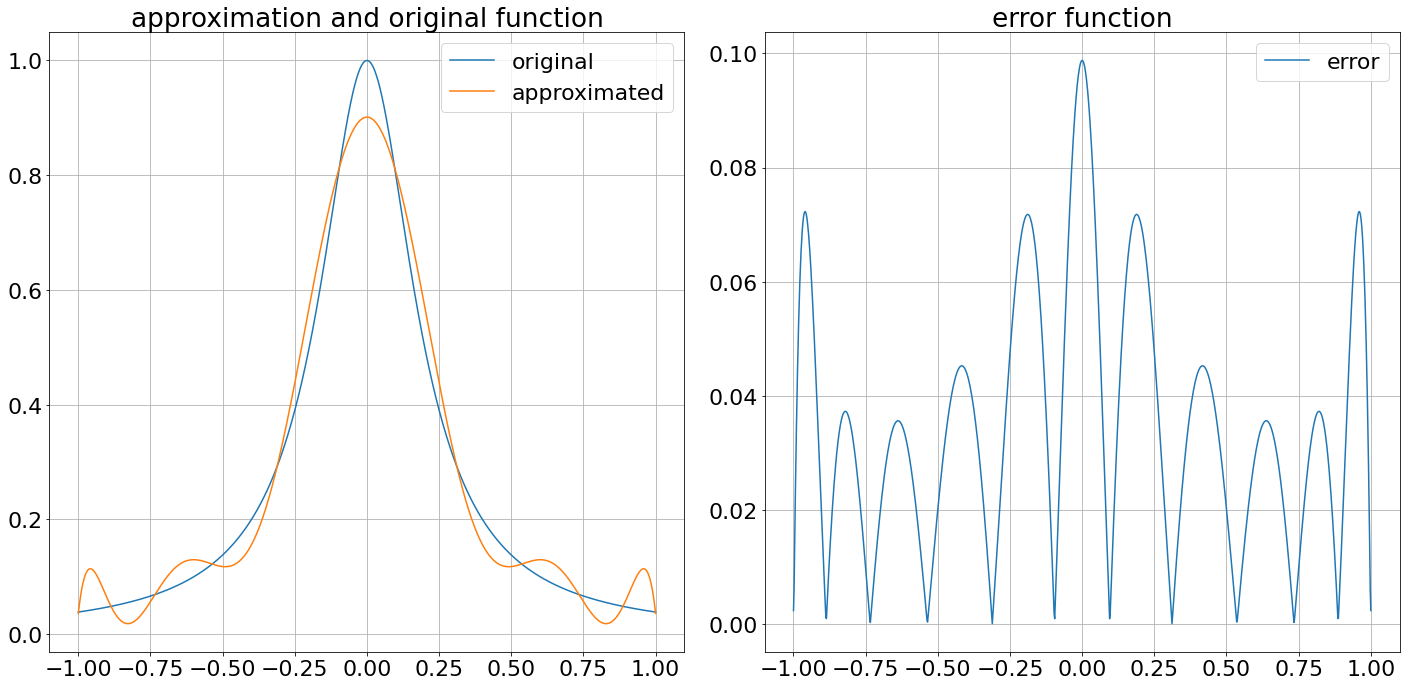

Poly(-36.4579556466193*x**10 + 6.22649714446141e-10*x**9 + 100.556470388835*x**8 - 1.38511999735475e-9*x**7 - 102.26281328831*x**6 + 1.01737969891517e-9*x**5 + 47.2939064569748*x**4 - 2.73967053786781e-10*x**3 - 9.99477612601916*x**2 + 1.97139245970766e-11*x + 0.90122555734702, x, domain='RR')

In [12]:
def discrete_approx(f, n = 21, k = 10, a = -1, b = 1):
    def S(k):
        return np.sum(points_x ** k)

    def T(k):
        return np.sum(points_x ** k * points_y)

    k+=1
    points_x = np.linspace(a, b, n)
    lf = lambdify (x, f)
    points_y = lf(points_x)

    matrix = np.zeros((k, k))
    T_matrix = np.zeros(k)

    for i in range (k):
        T_matrix[i] = T(i)
        for j in range(i, k):
            matrix[i][j] = matrix[j][i] = S(i + j)

    a_matrix = np.linalg.solve(matrix, T_matrix)

    res = Poly(sum([a * x ** i for i, a in enumerate(a_matrix)]))

    lamdified = lambdify(x, res.as_expr())
    plot_approx(f, lamdified)
    
    return res

discrete_approx(f)

## b) rozwiązując równanie normalne

#### współczynniki wielomianu aproksymującego obliczymy rozwiązując układ równań:
$$A\cdot a = y$$

$$\begin{bmatrix} 
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
\vdots & \vdots & \vdots & \ddots  & \vdots \\
1 & x_m & x_m^2 & \dots & x_m^n
\end{bmatrix} 
\cdot
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{bmatrix}
= 
\begin{bmatrix}
f(x_0) \\
f(x_1) \\
\vdots \\
f(x_n)
\end{bmatrix}$$

#### przez to, że macierz A nie jest kwadratowa, żeby rozwiązać ten układ równań musimy je przekształcić do postaci:
$A^T \cdot A \cdot a = A^T \cdot y$

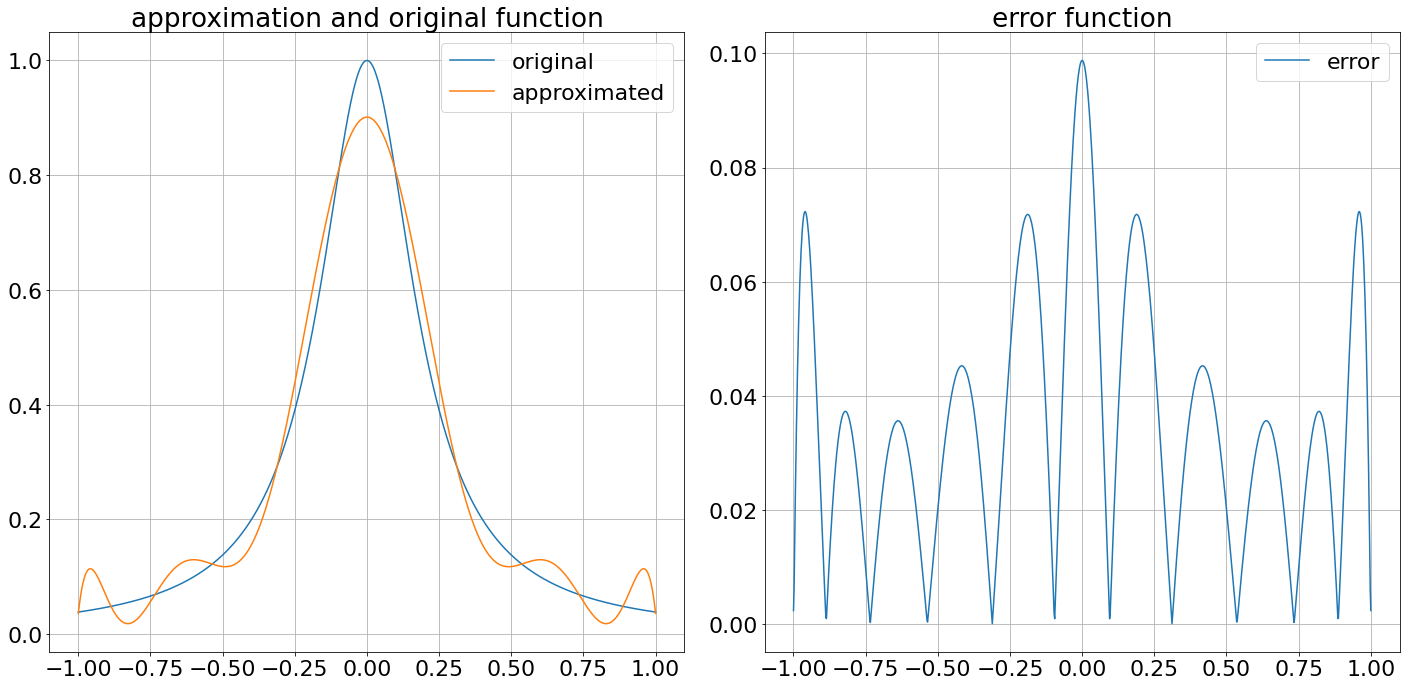

Poly(-36.4579556515367*x**10 - 1.24279046597294e-10*x**9 + 100.556470400917*x**8 + 2.80673945434938e-10*x**7 - 102.262813298625*x**6 - 2.10536659216776e-10*x**5 + 47.2939064605465*x**4 + 5.84720186381264e-11*x**3 - 9.99477612645047*x**2 - 4.42189335761424e-12*x + 0.901225557355402, x, domain='RR')

In [13]:
def discrete_approx_normal(f, n = 21, k = 10, a = -1, b = 1):
    k += 1
    points_x = np.linspace(a, b, num= n)
    lf = lambdify (x, f)
    points_y = lf(points_x)

    matrix = np.zeros([n, k])

    for i in range(k):
        matrix[:,i] = points_x ** i

    a_matrix = np.linalg.solve(matrix.T @ matrix, matrix.T @ points_y)

    res = Poly(sum([a * x ** i for i, a in enumerate(a_matrix)]))
    
    lamdified = lambdify(x, res.as_expr())
    plot_approx(f, lamdified)

    return res

discrete_approx_normal(f, n = 21)

# Zadanie 2
### Aproksymacja średniokwadratowa ciągła z wykorzystaniem wielomianów w bazie naturalnej
#### 
#### współczynniki wielomianu aproksymującego obliczymy rozwiązując układ równań:
#### $$S\cdot a = b$$


$$\begin{bmatrix} 
s_0 & s_1 & \dots & s_n \\
s_1 & s_2 & \dots & s_{n+1} \\
\vdots & \vdots & \ddots  & \vdots \\
s_n & s_{n+1} & \dots & s_{2n}
\end{bmatrix} 
\cdot
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{bmatrix}
= 
\begin{bmatrix}
b_0 \\
b_1 \\
\vdots \\
b_n
\end{bmatrix}$$
#### gdzie
##### $s_i = \int_{-1}^1 x^idx$
##### $b_i = \int_{-1}^1 x^i f(x) dx$

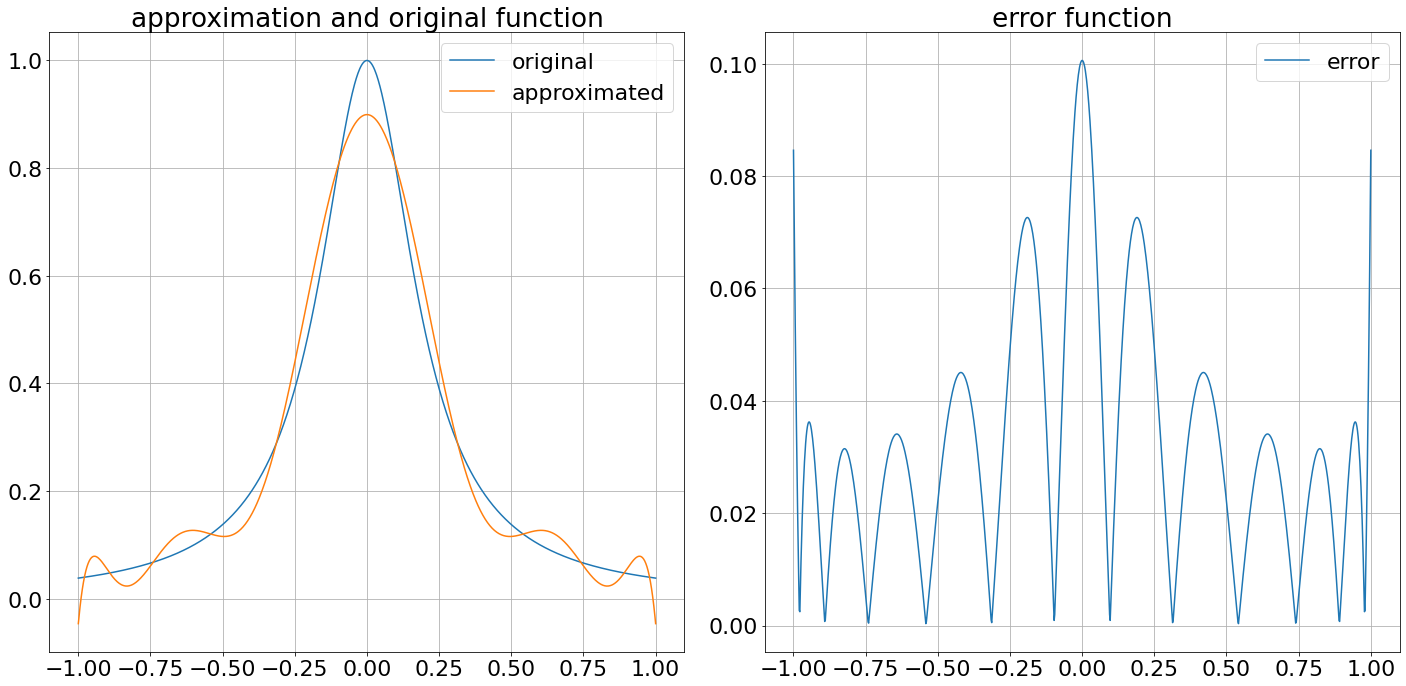

Poly(-35.9306481934522*x**10 + 98.4908166047454*x**8 - 100.076551517435*x**6 + 46.4653113210058*x**4 - 9.8944737109408*x**2 + 0.899424505458324, x, domain='RR')

In [14]:
def continuous_approx_Monomial_Poly(f, k = 10, a = -1, b = 1):
    k+=1
    matrix = np.zeros((k, k))
    b_matrix = np.zeros(k)

    for i in range (k):
        b_matrix[i] = integrate((f * x ** i).as_expr(), (x, -1, 1))
        for j in range(i, k):
            matrix[i][j] = matrix[j][i] = integrate((x**(i + j)).as_expr(), (x, -1, 1))

    a_matrix = np.linalg.solve(matrix, b_matrix)

    res = Poly(sum([a * x ** i for i, a in enumerate(a_matrix)]))
    lamdified = lambdify(x, res.as_expr())
    plot_approx(f, lamdified)

    return res

continuous_approx_Monomial_Poly(f) 

# Zadanie 3
## Aproksymacja średniokwadratowa ciągła z wykorzystaniem wielomianów Legendr'a
### $P_i(x) = \frac{(2i - 1)\cdot x \cdot P_{i-1}\  - \ (i - 1)\cdot P_{i-2}}{i}$
#### współczynniki wielomianu aproksymującego obliczymy rozwiązując układ równań:
#### $$S\cdot a = b$$


$$\begin{bmatrix} 
s_0 & 0 & \dots & 0 \\
0 & s_2 & \dots & 0 \\
\vdots & \vdots & \ddots  & \vdots \\
0 & 0 & \dots & s_{n}
\end{bmatrix} 
\cdot
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{bmatrix}
= 
\begin{bmatrix}
b_0 \\
b_1 \\
\vdots \\
b_n
\end{bmatrix}$$
#### gdzie
##### $s_i = \int_{-1}^1 P_i^2(x)\ dx = \frac{2}{2m - 1}$
##### $b_i = \int_{-1}^1 P_i \cdot f(x) \ dx$

#### Dzięki temu, że macierz S jest diagonalna możemy obliczyc współczynniki $a$ poprzez przekształcenie:
#### $a_i = \frac{1}{s_i} \cdot \int_{-1}^1 P_i \cdot f(x) \ dx $

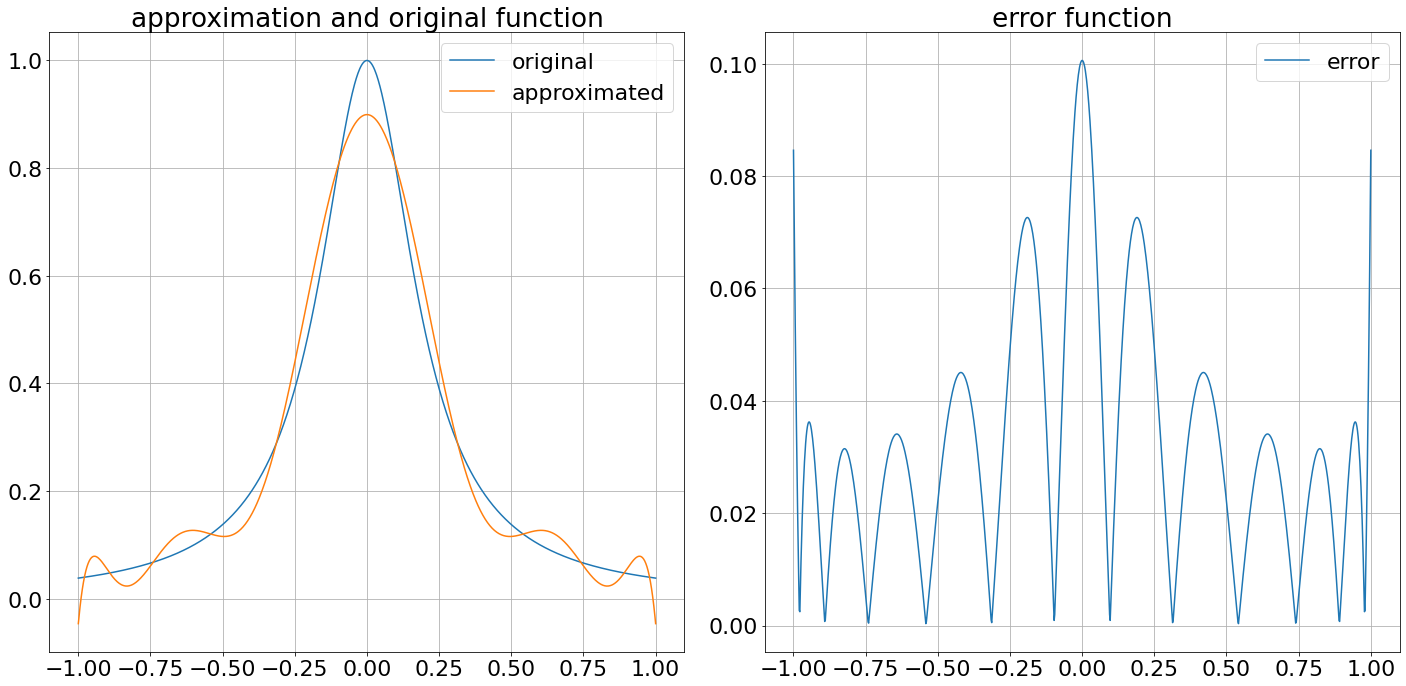

Poly(-35.9306481960537*x**10 + 98.4908166109718*x**8 - 100.076551522629*x**6 + 46.4653113227651*x**4 - 9.89447371114785*x**2 + 0.899424505462176, x, domain='RR')

In [15]:
def continuous_approx_Legendre_polynomials(f, k = 10):
    def LegendrePoly(n):
        if n == 0:
            return poly(1, x)
        if n == 1:
            return poly(x)
        return 1/(n) * ((2*n - 1) * x * LegendrePoly(n-1) - (n - 1) * LegendrePoly(n-2))
    
    def s(i):
#         return integrate((LegendrePoly(i) ** 2).as_expr(), (x, -1, 1))
        return 2 / (2*i + 1)
    
    def b(i):
        b = (f * LegendrePoly(i).as_expr())
        bl = lambdify(x, b)
        return 1 / s(i) * quad(bl, -1, 1)[0]

    k+=1
    res = 0

    for i in range(k):
        res += b(i) * LegendrePoly(i)

    lambdified = lambdify(x, res.as_expr())
    plot_approx(f, lambdified)

    return res

continuous_approx_Legendre_polynomials(f)

# Zadanie 4
## aproksymacja średniokwadratowa ciągła z wykorzystaniem wielomianów Czybyszewa
### $T_i(x) = 2 x \cdot T_{i-1} - T_{i-2}$
#### możemy je również wyznaczyć ze wzoru jawnego:
### $T_i(x) = \cos{(n \cdot \arccos{x})}$
#### współczynniki wielomianu aproksymującego obliczymy rozwiązując układ równań taki sam jak w poprzednim zadaniu, jednak z drobnymi zmianami:
#### wprowadzamy funkcję $w(x) = \frac{1}{\sqrt{1-x^2}}$
##### 
$s_i = \int_{-1}^1 w \cdot T_i^2(x)\ dx = 
\left\{
\begin{array}{ll}
\pi & \textrm{gdy $i = 0$}\\
\frac{\pi}{2} & \textrm{gdy $i > 0$}
\end{array} \right.$

##### $b_i = \int_{-1}^1 w \cdot T_i \cdot f(x) \ dx$

#### A współczynniki $a$ obliczymy wykorzystując wzór:
#### $a_i = \frac{1}{s_i} \cdot \int_{-1}^1 w \cdot T_i \cdot f(x) \ dx $

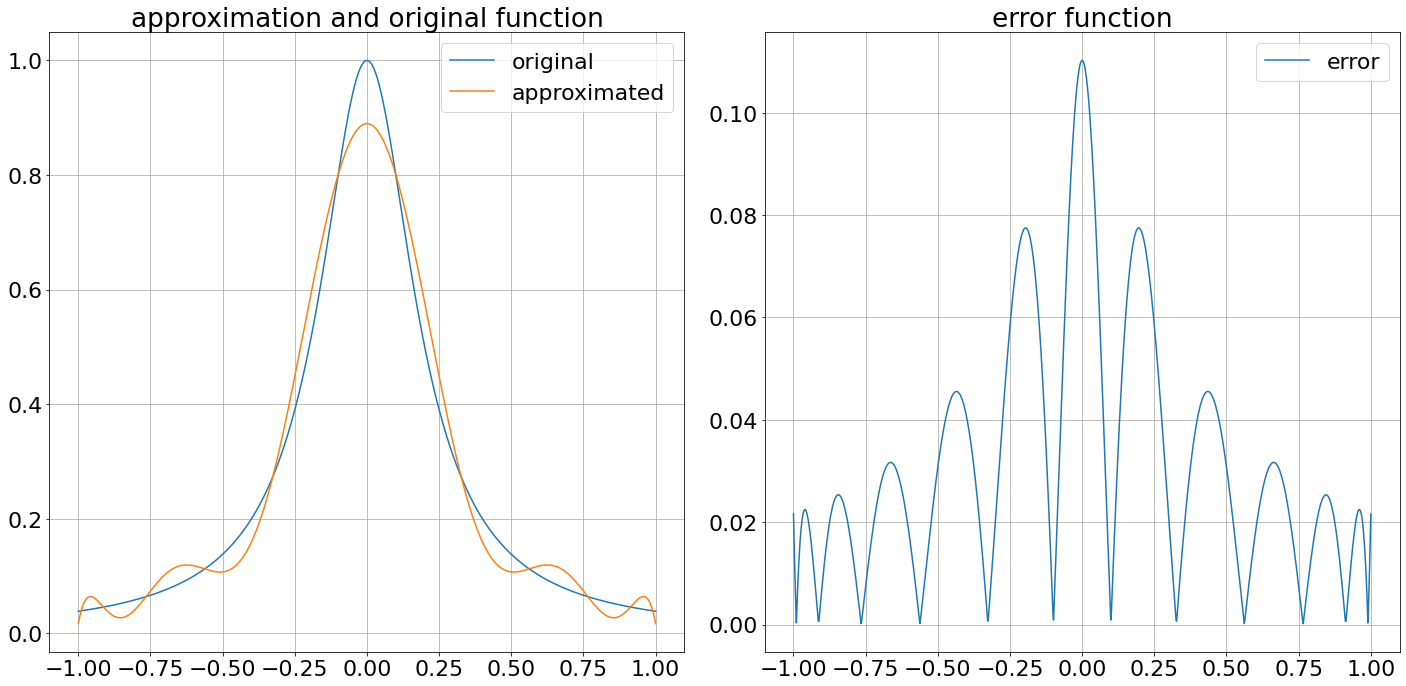

Poly(-86.5093342870804/pi*x**10 + 248.453111647837/pi*x**8 - 265.568966222617/pi*x**6 + 130.218202371906/pi*x**4 - 29.3353967791511/pi*x**2 + 2.79530022258483/pi, x, domain='RR(pi)')

In [16]:
def continuous_approx_Chebyshev_polynomials(f, k = 10):
    def ChebyshevPoly(n):
        # return cos(n * acos(x))
        if n == 0:
            return poly(1, x)
        if n == 1:
            return poly(x)
        return 2 * x * ChebyshevPoly(n-1) - ChebyshevPoly(n-2)
    
    def s(k):
        if k == 0:
            return pi
        return pi / 2
#         to_integrate = w * (ChebyshevPoly(k).as_expr()  ** 2)
#         lambdified = lambdify(x, to_integrate)
#         return quad(lambdified, -1, 1)[0]

    def a(k):
        to_integrate = w * ChebyshevPoly(k).as_expr() * f
        lambdified = lambdify(x, to_integrate)

        return 1/s(k) * quad(lambdified, -1, 1)[0]
    
    w = 1 / sqrt(1 - x ** 2)   
    k+=1
    res = 0
    for i in range(k):
        res += a(i) * ChebyshevPoly(i)

    lambdified = lambdify(x, res.as_expr())
    plot_approx(f, lambdified)

    return res

continuous_approx_Chebyshev_polynomials(f)